### Import datasets for Analysis

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Reading files and store 
companies = pd.read_csv("companies.csv", encoding = "ISO-8859-1")
rounds = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

In [37]:
# Check rounds & companies dataset 
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [38]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [39]:
## look at the structure of both datasets
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [40]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [41]:
## Check for null values
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [42]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [43]:
##Check unique values
len(rounds.company_permalink.unique())

90247

In [44]:
len(companies.permalink.unique())

66368

In [45]:
##Converting permalink of companies and company_permalink of rounds to lower case for better matching
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [46]:
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [47]:
companies['name']=companies['name'].str.lower()

In [48]:
##Check for unique again
len(companies.permalink.unique())

66368

In [50]:
len(rounds.company_permalink.unique())

66370

In [51]:
rounds.loc[~rounds['company_permalink'].isin (companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [52]:
## Fixing encoding issue to utf-8
rounds['company_permalink']=rounds[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

In [53]:
##Check again the round and companies 
rounds.loc[~rounds['company_permalink'].isin (companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [54]:
companies.loc[~rounds.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
77,/organization/16lab-inc-,16lab inc.,http://16lab.net,Design|Development Platforms|Wearables,operating,JPN,19,JPN - Other,Kamakura,24-04-2013
729,/organization/abizinabox,abizinabox,http://abizinabox.com,Accounting|Consulting|CRM|Marketing Automation...,operating,USA,IL,Chicago,Evanston,17-08-1998
2670,/organization/alpha-smart-systems,alpha smart systems,http://alpha-smart.com/,Artificial Intelligence|Information Services|I...,closed,RUS,48,Moscow,Moscow,01-01-2011
3166,/organization/analyte-logic,analyte logic,http://analytelogic.com,Biotechnology,operating,USA,CO,Denver,Denver,01-01-2008
3291,/organization/angiolink-corporation,angiolink corporation,http://angiolink.com/,Health Care|Innovation Management|Medical Devices,closed,NaN,NaN,NaN,NaN,01-01-1999
4568,/organization/asic-engineering-corporation,asic engineering corporation,NaN,Engineering Firms|Services,closed,NaN,NaN,NaN,NaN,NaN
8097,/organization/boosterville,boosterville,http://www.boosterville.com,K-12 Education|Mobile|Nonprofits|Payments|Soci...,operating,USA,TN,Memphis,Memphis,15-03-2013
8652,/organization/broadlane,broadlane,NaN,Health and Wellness|Health Care|Medical|Services,operating,NaN,NaN,NaN,NaN,NaN
9784,/organization/career-athletes,athlete network,http://athletenetwork.com,Brand Marketing|Internet,operating,USA,KS,Kansas City,Kansas City,01-01-2014
14311,/organization/custopharm,custopharm,http://www.custopharm.com/,Biotechnology|Health and Wellness|Medical|Phar...,operating,USA,CA,San Diego,Carlsbad,01-01-2005


In [55]:
companies['permalink']=companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

In [56]:
companies.loc[~companies['permalink'].isin (rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [57]:
##Merge Companies & Round Df's 
master_frame = pd.merge(rounds,companies, left_on="company_permalink", right_on="permalink", how='left')

In [58]:
## Check Shape of master df
master_frame.shape

(114949, 16)

### Data cleasing & Treatment of Missing value 

In [59]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [60]:
## Removing columns in master df which are not needed
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [61]:
master_frame = master_frame.drop(['company_permalink'], axis = 1) ##  dropped company_permalink as there is duplicate

In [62]:
master_frame.shape

(114949, 15)

In [63]:
master_frame = master_frame[master_frame['status']!='closed'] ## Investments are not possible in 'closed' status

In [64]:
## Percentage of missing value column wise
round(100*(master_frame.isnull().sum())/len(master_frame.index), 2)

funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.74
funded_at                   0.00
raised_amount_usd          17.25
permalink                   0.00
name                        0.00
homepage_url                5.00
category_list               2.25
status                      0.00
country_code                6.43
state_code                  8.41
region                      7.72
city                        7.71
founded_at                 16.80
dtype: float64

In [ ]:
## Clearly funding_round_code has highest null values - Other columns are founded_at,city ,region,homepage_url,state_code

In [65]:
## Dropping above mentioned columns
master_frame = master_frame.drop(['founded_at','city','region','state_code','funding_round_code','homepage_url'], axis=1)

In [66]:
## Check Master df again
master_frame.shape

(106224, 9)

In [67]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,/organization/-qounter,:qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN


In [68]:
round(100*(master_frame.isnull().sum())/len(master_frame.index), 2)

funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.25
permalink                   0.00
name                        0.00
category_list               2.25
status                      0.00
country_code                6.43
dtype: float64

In [69]:
##Check Summary Statistics for raised_amount_usd column
master_frame.raised_amount_usd.describe()

count    8.790300e+04
mean     1.065487e+07
std      1.190394e+08
min      0.000000e+00
25%      3.400000e+05
50%      1.713962e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [70]:
## Removing NaN's from raised_amount_usd column
master_frame = master_frame[~np.isnan(master_frame.raised_amount_usd)]

In [71]:
round(100*(master_frame.isnull().sum())/len(master_frame.index), 2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.72
status                     0.00
country_code               5.26
dtype: float64

In [72]:
country_codes = master_frame['country_code'].astype('category')

In [75]:
country_codes.value_counts()

USA    58011
GBR     4708
CAN     2410
CHN     1869
IND     1590
       ...  
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 131, dtype: int64

In [76]:
round(100*(master_frame['country_code'].value_counts())/len(master_frame.index))

USA    66.0
GBR     5.0
CAN     3.0
CHN     2.0
IND     2.0
       ... 
OMN     0.0
DZA     0.0
KNA     0.0
PRY     0.0
TGO     0.0
Name: country_code, Length: 131, dtype: float64

In [78]:
##removing rows with missing country codes
master_frame = master_frame[~pd.isnull(master_frame['country_code'])]

In [79]:
round(100*(master_frame.isnull().sum())/len(master_frame.index), 2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.52
status                     0.00
country_code               0.00
dtype: float64

In [81]:
##removing rows with missing category_list
master_frame = master_frame[~pd.isnull(master_frame['category_list'])]

In [82]:
round(100*(master_frame.isnull().sum())/len(master_frame.index), 2)

funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

### Funding Type Analysis

In [83]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
6,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/organization/01games-technology,01games technology,Games,operating,HKG
7,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN


In [85]:
master_frame.funding_round_type.value_counts()

venture                  44748
seed                     19731
debt_financing            6102
angel                     3960
grant                     1823
private_equity            1723
undisclosed               1286
convertible_note          1271
equity_crowdfunding       1119
post_ipo_equity            544
product_crowdfunding       320
post_ipo_debt              138
non_equity_assistance       56
secondary_market            25
Name: funding_round_type, dtype: int64

In [86]:
## Looking only below fund type
master_frame = master_frame[(master_frame.funding_round_type == "venture") |
                           (master_frame.funding_round_type == "seed" ) |
                           (master_frame.funding_round_type == "angel" ) |
                           (master_frame.funding_round_type == "private_equity" ) ]

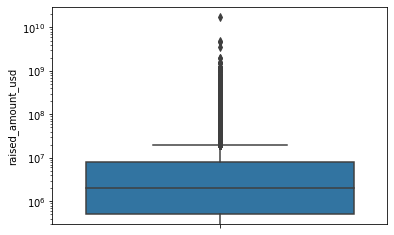

In [87]:
##Checking distribution of raised_amount_usd
sns.boxplot(y=master_frame.raised_amount_usd)
plt.yscale('log')
plt.show()

In [88]:
master_frame.raised_amount_usd.describe()

count    7.016200e+04
mean     9.722451e+06
std      8.042823e+07
min      0.000000e+00
25%      4.999980e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [92]:
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].mean())

funding_round_type
angel               997188.0
private_equity    75976019.0
seed                763280.0
venture           11893957.0
Name: raised_amount_usd, dtype: float64

In [90]:
## compare the median investments accorss all investment types 
master_frame.groupby('funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel               418856.0
private_equity    21000000.0
seed                313837.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

In [95]:
## By Above analysis looks like Venture fund type falls between 5 to 15 million USD
## creating a new df for venture fund for better analysis
master_frame_venture_only = master_frame[master_frame.funding_round_type == 'venture']

## Country Analysis

In [97]:
master_frame_venture_only.isna().sum()

funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       0
category_list              0
status                     0
country_code               0
dtype: int64

In [101]:
## Creating df for top 9 countries
top9_countries = master_frame_venture_only.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by = ['raised_amount_usd'],ascending=False).head(9)

In [102]:
top9_countries['Rank'] = range(1,10)

In [104]:
top9_countries.set_index(['Rank'],inplace = True)

In [105]:
top9_countries.shape

(9, 2)

In [106]:
## List for top 9 country by raised_amount_usd
top9_countries

,country_code,raised_amount_usd
Rank,,
1,USA,3.983246e+11
2,CHN,3.864227e+10
3,GBR,1.814229e+10
4,IND,1.392025e+10
5,CAN,8.747168e+09
6,FRA,6.742609e+09
7,ISR,6.484357e+09
8,DEU,6.021103e+09
9,JPN,3.156202e+09


In [107]:
master_frame_venture_only.shape

(44748, 9)

In [108]:
master_frame_venture_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44748 entries, 0 to 114941
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  44748 non-null  object 
 1   funding_round_type       44748 non-null  object 
 2   funded_at                44748 non-null  object 
 3   raised_amount_usd        44748 non-null  float64
 4   permalink                44748 non-null  object 
 5   name                     44748 non-null  object 
 6   category_list            44748 non-null  object 
 7   status                   44748 non-null  object 
 8   country_code             44748 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [109]:
master_frame_venture_only.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,h2o.ai,Analytics,operating,USA
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,h2o.ai,Analytics,operating,USA


## Sector Analysis

In [110]:
mapping=pd.read_csv('mapping.csv')

In [111]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [ ]:
##check for null values

In [112]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [114]:
## Extracting main category

Primary_Sector = master_frame_venture_only['category_list'].str.split('|',n=1,expand=True)

In [115]:
master_frame_venture_only.shape

(44748, 9)

In [117]:
Primary_Sector.shape

(44748, 2)

In [121]:
# Filling the 'Primary_Sector' column with the extrated category values.
master_frame_venture_only['Primary_Sector']=Primary_Sector[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [123]:
## Using melt function from pandas library 
melted=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [124]:
##check melted value
melted.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [125]:
# Taking column entries which have 1 in the respective cells.
melted=melted[melted.value==1]

In [126]:
melted=melted.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [127]:
melted=melted.drop('value',axis=1)

In [129]:
##creating merged df 
master_DF = pd.merge(master_frame_venture_only,melted,on='Primary_Sector',how='inner')

In [131]:
master_DF.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9260
Entertainment                               2467
Health                                      3735
Manufacturing                               3075
News, Search and Messaging                  5427
Others                                     10591
Social, Finance, Analytics, Advertising     6516
Name: main_sector, dtype: int64

In [133]:
## Removing Blank sector which does not make sense
master_DF=master_DF[master_DF.main_sector!='Blanks']

In [135]:
#From the below analysis we see there are 8 main sectors
master_DF.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9260
Entertainment                               2467
Health                                      3735
Manufacturing                               3075
News, Search and Messaging                  5427
Others                                     10591
Social, Finance, Analytics, Advertising     6516
Name: main_sector, dtype: int64

In [136]:
master_DF.shape

(41761, 11)

In [137]:
master_frame_venture_only.shape

(44748, 10)

## Sector Analysis part 2

In [161]:
## Create new Df to copy only betn 5 -15 Mil USD for better analysis
master_DF_5_to_15 = master_DF[master_DF['raised_amount_usd'].between(5000000,15000000,inclusive=True)]

In [162]:
master_DF_5_to_15.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,Primary_Sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,Media,Entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,all def digital,Media,operating,USA,Media,Entertainment
14,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,/organization/chefs-feed,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment


In [163]:
master_DF_5_to_15.shape

(13671, 11)

In [142]:
###Creating three separate data frames D1, D2 and D3 for each of the three countries containing 
###the observations of funding type FT falling within the 5-15 million USD range.

In [164]:
D1 = master_DF_5_to_15[master_DF_5_to_15['country_code']=='USA']

In [165]:
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))

In [166]:
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [167]:
D2 = master_DF_5_to_15[master_DF_5_to_15['country_code']=='GBR']

In [168]:
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))

In [169]:
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [170]:
D3 = master_DF_5_to_15[master_DF_5_to_15['country_code']=='IND']

In [171]:
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))

In [172]:
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [173]:
master_DF_5_to_15[master_DF_5_to_15['main_sector'].isnull()]

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,Primary_Sector,main_sector


In [174]:
master_DF_5_to_15.shape

(13671, 11)

##### Total number of Investments (count)

In [177]:

D1.shape[0]

10404

In [175]:
D2.shape[0]

542

In [176]:
D3.shape[0]

287

##### Total amount of investment (USD)

In [178]:
D1.raised_amount_usd.sum()

93176222534.0

In [179]:
D2.raised_amount_usd.sum()

4728734985.0

In [180]:
D3.raised_amount_usd.sum()

2569667552.0

#### Top Sector name (no. of investment-wise)

In [181]:
top_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]

In [182]:
top_sector_D1

'Others'

In [183]:
top_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D2

'Others'

In [184]:
top_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D3

'Others'

#### Second Sector name (no. of investment-wise)

In [185]:
BestSector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
BestSector_D1

'Cleantech / Semiconductors'

In [186]:
BestSector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
BestSector_D2

'Cleantech / Semiconductors'

In [187]:
BestSector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
BestSector_D3

'News, Search and Messaging'

#### Number of investments in top sector

In [188]:
third_best_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D1

'Social, Finance, Analytics, Advertising'

In [189]:
third_best_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D2

'Social, Finance, Analytics, Advertising'

In [190]:
third_best_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D3

'Social, Finance, Analytics, Advertising'

#### Number of investments in the top sector

In [191]:
D1[D1.main_sector == top_sector_D1].shape[0]

2732

In [192]:
D2[D2.main_sector == top_sector_D2].shape[0]

137

In [193]:
D3[D3.main_sector == top_sector_D3].shape[0]

102

#### Number of investments in the second-best sector 

In [195]:
D1[D1.main_sector == BestSector_D1].shape[0]

2145

In [196]:
D2[D2.main_sector == BestSector_D2].shape[0]

114

In [197]:
D3[D3.main_sector == BestSector_D3].shape[0]

49

#### Number of investments in the third-best sector 

In [198]:
D1[D1.main_sector == third_best_D1].shape[0]

1813

In [199]:
D2[D2.main_sector == third_best_D2].shape[0]

95

In [200]:
D3[D3.main_sector == third_best_D3].shape[0]

32

#### For the top sector count-wise, which company received the highest investment (POINT 3)

In [201]:
D1[D1.main_sector == top_sector_D1].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'kaminario'

In [202]:
D2[D2.main_sector == top_sector_D2].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'notonthehighstreet'

In [203]:
D3[D3.main_sector == top_sector_D3].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'itzcash card ltd.'

#### For the top sector count-wise, which company received the highest investment (POINT 4)

In [208]:
D1[D1.main_sector == BestSector_D1].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'sunverge energy, inc'

In [209]:
D2[D2.main_sector == BestSector_D1].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'elixent'

In [211]:
D3[D3.main_sector == BestSector_D3].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'mobile2win india'

## PLOT DATA 

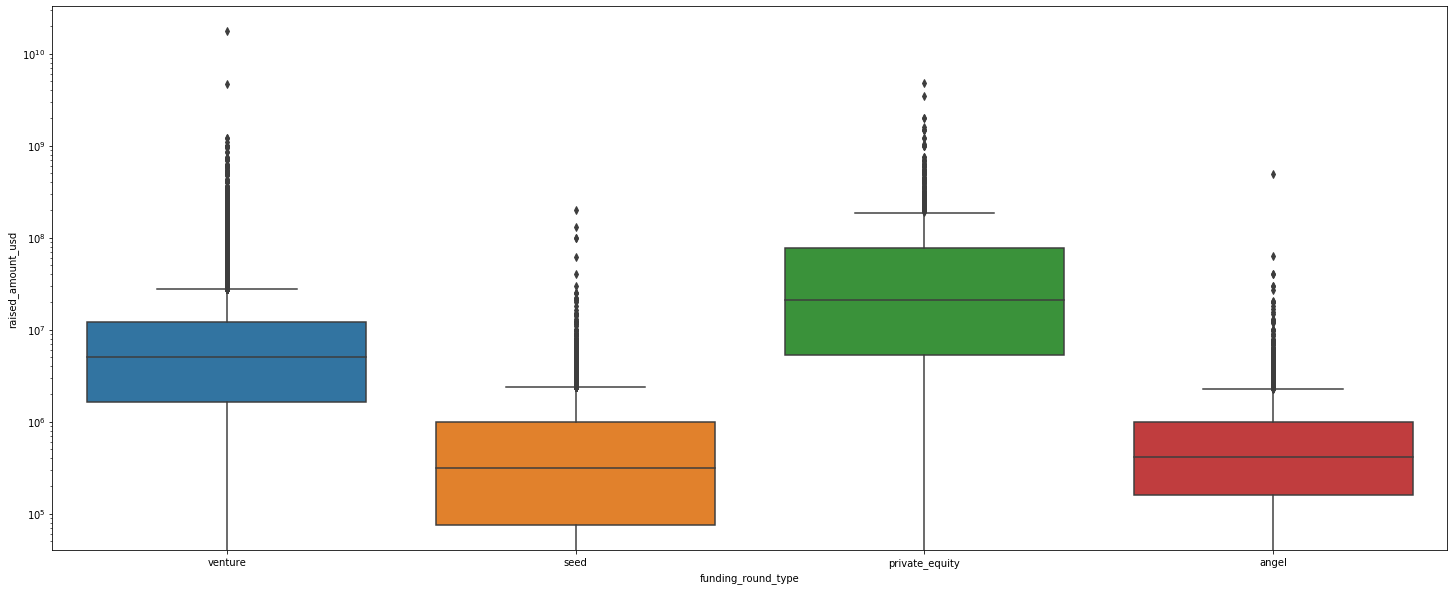

In [230]:
## Boxplot of funds
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

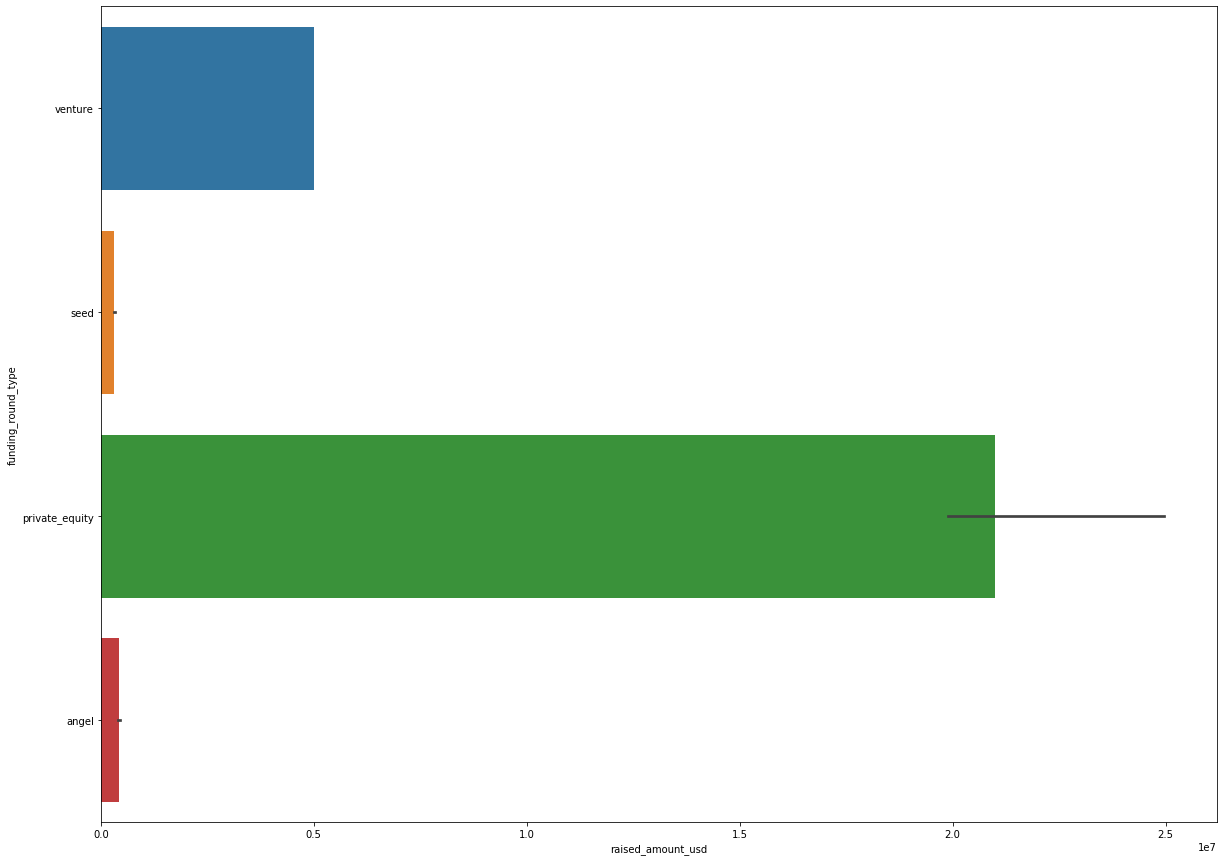

In [213]:
#  plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type
plt.figure(figsize=(20, 15))
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

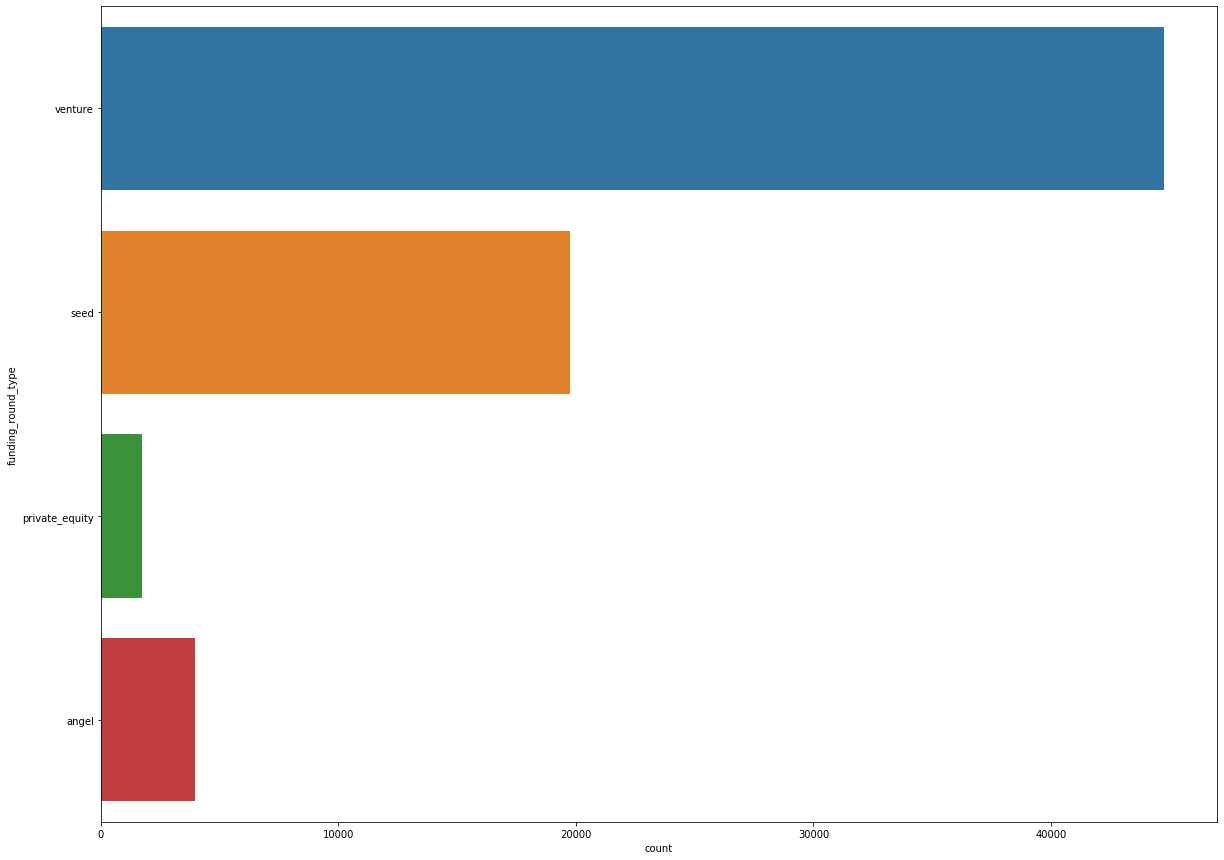

In [214]:
#  plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type
plt.figure(figsize=(20, 15))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

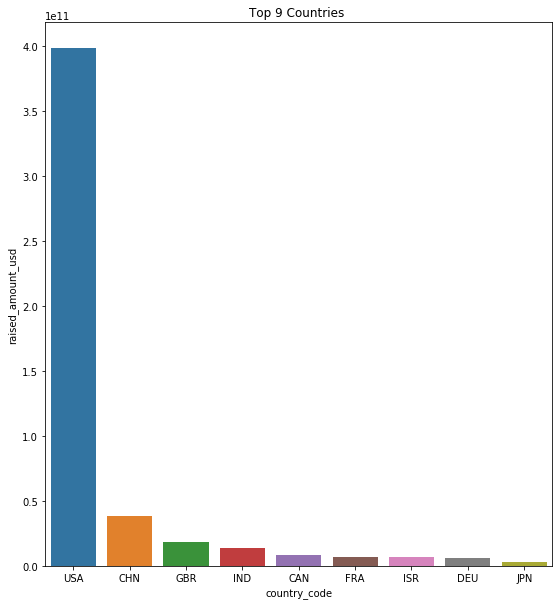

In [231]:
# Plotting top 9 countries for investments

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x="country_code", y="raised_amount_usd", data= top9_countries, estimator=sum)
plt.title("Top 9 Countries ")
plt.show()

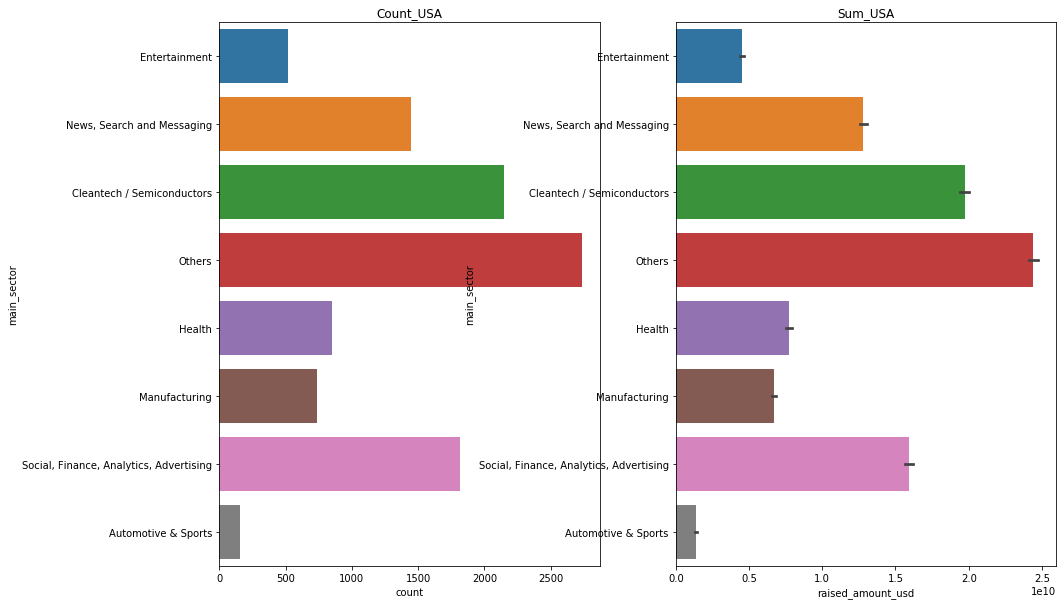

In [227]:
##A plot showing the number of investments in the top 3 sectors of the top 3 countries - USA
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D1)
plt.title("Count_USA")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D1, estimator=sum)
plt.title("Sum_USA")
plt.show()

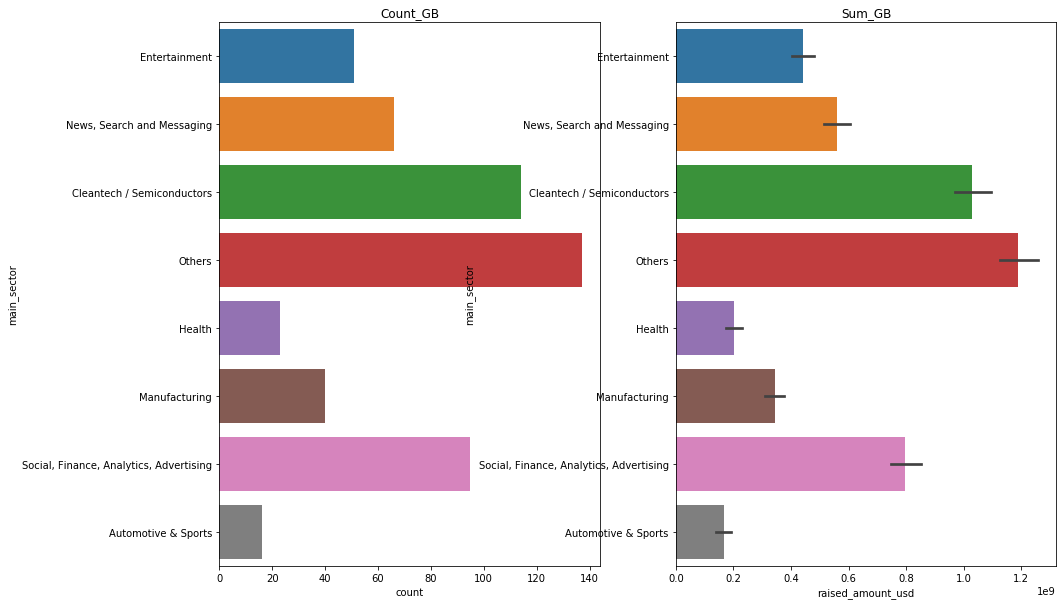

In [226]:
##A plot showing the number of investments in the top 3 sectors of the top 3 countries - Great Britain
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D2)
plt.title("Count_GB")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D2, estimator=sum)
plt.title("Sum_GB")
plt.show()

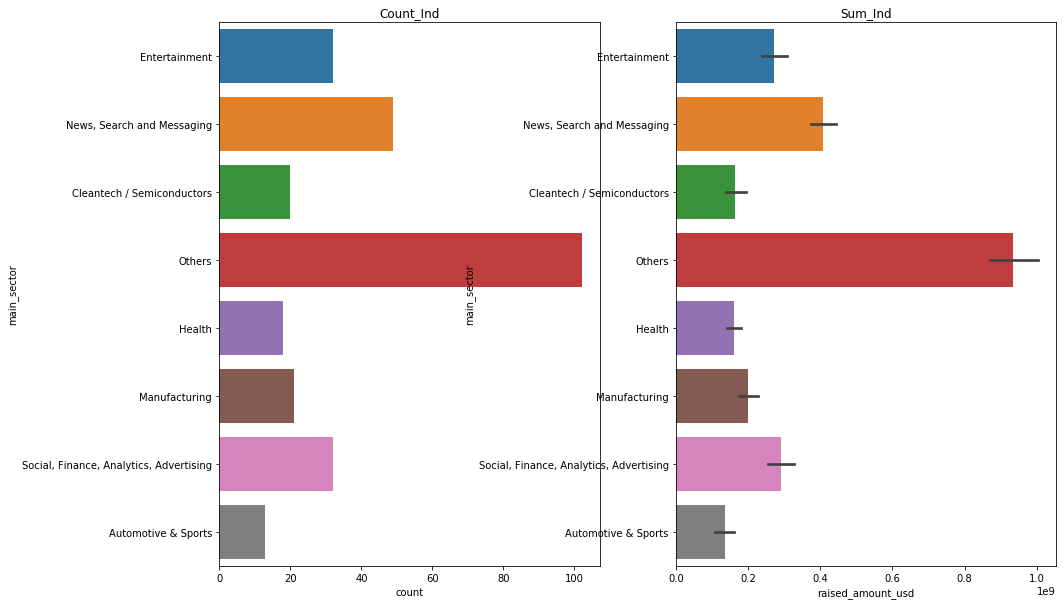

In [228]:
##A plot showing the number of investments in the top 3 sectors of the top 3 countries - India
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D3)
plt.title("Count_Ind")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D3, estimator=sum)
plt.title("Sum_Ind")
plt.show()